# Dataset Size Experiments

Explore how dataset size affects accuracy.

In [7]:
from square_classifier import build_square_classifier
from train_square_classifier import get_training_generator as get_square_training_generator
from train_square_classifier import get_validation_generator as get_square_validation_generator
from train_board_extractor import get_training_generator as get_board_training_generator
from train_board_extractor import get_validation_generator as get_board_validation_generator
from train_board_extractor import matrix
from u_net import get_unet_256
import keras
import matplotlib.pyplot as plt

In [2]:
## Train 10 square classifiers

valid_generator = get_square_validation_generator(batch_size=32)
N_valid = len(valid_generator)
epochs = 10
accs = []
fracs = list(range(10, 101, 10))

for frac in fracs:
    model = build_square_classifier()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    
    train_generator = get_square_training_generator(sample=frac, batch_size=32)
    N_train = len(train_generator)

    history = model.fit_generator(generator=train_generator,
                        steps_per_epoch=N_train,
                        epochs=epochs,
                        verbose=0,
                        validation_data=valid_generator,
                        validation_steps=N_valid)
    
    accs.append(history.history["val_acc"][-1])
    del model

Only using first 851 of 8511 training examples
Only using first 1702 of 8511 training examples
Only using first 2553 of 8511 training examples
Only using first 3404 of 8511 training examples
Only using first 4256 of 8511 training examples
Only using first 5107 of 8511 training examples
Only using first 5958 of 8511 training examples
Only using first 6809 of 8511 training examples
Only using first 7660 of 8511 training examples
Only using first 8511 of 8511 training examples


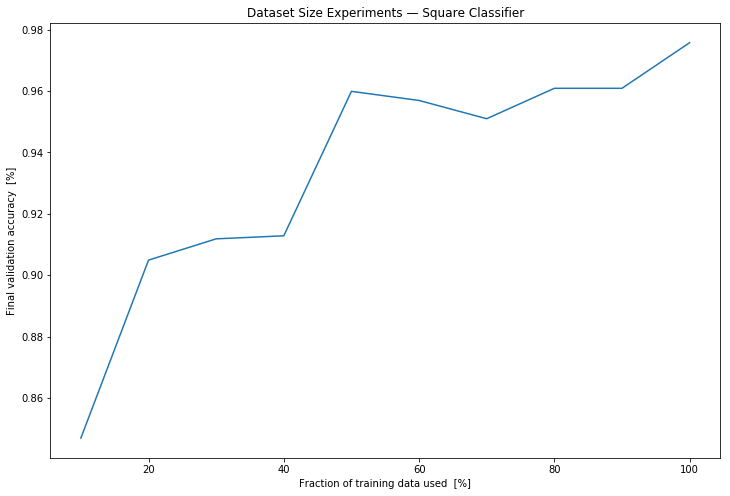

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(fracs, accs)
plt.xlabel("Fraction of training data used  [%]")
plt.ylabel("Final validation accuracy  [%]")
plt.title("Dataset Size Experiments — Square Classifier")
plt.show()

In [16]:
## Train 10 board extractors
from quilt.data.gudbrandtandberg import chessboard_segmentation as chessboards
from sklearn.model_selection import train_test_split
import math

images, masks = chessboards(asa=matrix())
img_train, img_valid, mask_train, mask_valid = train_test_split(images, masks)

validation_generator = get_board_validation_generator(img_valid, mask_valid)
N_valid = len(img_valid)

epochs = 10
accs = []
fracs = list(range(10, 101, 10))

for frac in fracs:
    model = get_unet_256()
    
    training_generator = get_board_training_generator(img_train, mask_train, sample=frac)
    N_train = len(img_train) * frac / 100.
    
    model.fit_generator(generator=training_generator,
                            steps_per_epoch=math.floor(float(N_train / 16.)),
                            epochs=epochs,
                            verbose=0,
                            validation_data=validation_generator,
                            validation_steps=math.floor(float(N_valid) / 16.))
    
    accs.append(history.history["val_loss"][-1])
    del model

Only using first 41 of 408 training examples


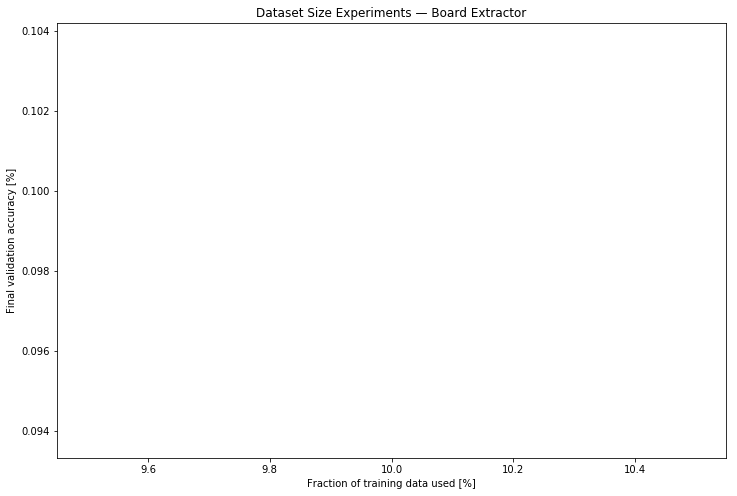

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(fracs, accs)
plt.xlabel("Fraction of training data used [%]")
plt.ylabel("Final validation accuracy [%]")
plt.title("Dataset Size Experiments — Board Extractor")
plt.show()

In [18]:
accs[0]

0.09875874062137491